⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️

# ML PROJECT (Mini)
# Applying Regression ....

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel("HEALTHEXP.xlsx")

In [3]:
data.shape

(274, 5)

In [4]:
data.columns

Index(['Unnamed: 0', 'Year', 'Country', 'Spending_USD', 'Life_Expectancy'], dtype='object')

In [5]:
data.head(4)

,Unnamed: 0,Year,Country,Spending_USD,Life_Expectancy
0,0,1970,Germany,252.311,70.6
1,1,1970,France,192.143,72.2
2,2,1970,Great Britain,123.993,71.9
3,3,1970,Japan,150.437,72.0


In [6]:
data.dtypes

Unnamed: 0           int64
Year                 int64
Country             object
Spending_USD       float64
Life_Expectancy    float64
dtype: object

In [7]:
data.tail(4)

,Unnamed: 0,Year,Country,Spending_USD,Life_Expectancy
270,270,2020,France,5468.418,82.3
271,271,2020,Great Britain,5018.700,80.4
272,272,2020,Japan,4665.641,84.7
273,273,2020,USA,11859.179,77.0


In [8]:
pd.isnull(data).sum()

Unnamed: 0         0
Year               0
Country            0
Spending_USD       0
Life_Expectancy    0
dtype: int64

In [9]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [10]:
data.head(2)

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2


In [11]:
data.nunique()

Year                51
Country              6
Spending_USD       274
Life_Expectancy    118
dtype: int64

In [12]:
pd.unique(data['Country'])

array(['Germany', 'France', 'Great Britain', 'Japan', 'USA', 'Canada'],
      dtype=object)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


In [14]:
data.describe()

,Year,Spending_USD,Life_Expectancy
count,274.000000,274.000000,274.000000
mean,1996.992701,2789.338905,77.909489
std,14.180933,2194.939785,3.276263
min,1970.000000,123.993000,70.600000
25%,1985.250000,1038.357000,75.525000
50%,1998.000000,2295.578000,78.100000
75%,2009.000000,4055.610000,80.575000
max,2020.000000,11859.179000,84.700000


### **EDA**__________

In [15]:
sns.set(style="whitegrid")

In [16]:
data.head(3)

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9


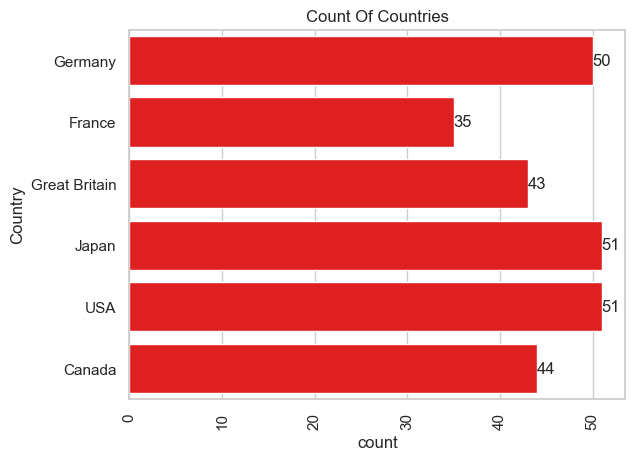

In [17]:
ax=sns.countplot(y='Country',data=data,color='red')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Count Of Countries')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Life_Expectancy', ylabel='Count'>

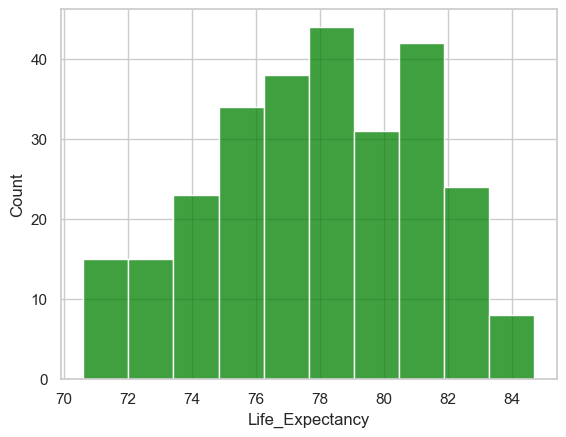

In [18]:
sns.histplot(data['Life_Expectancy'],color='green')

<Axes: xlabel='Spending_USD', ylabel='Count'>

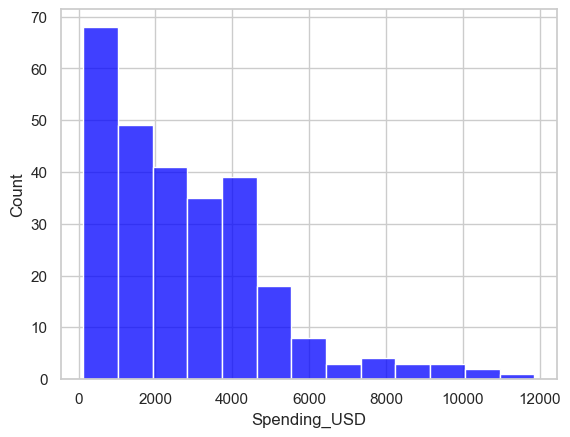

In [19]:
sns.histplot(data['Spending_USD'],color='blue')

<Axes: xlabel='Country', ylabel='Life_Expectancy'>

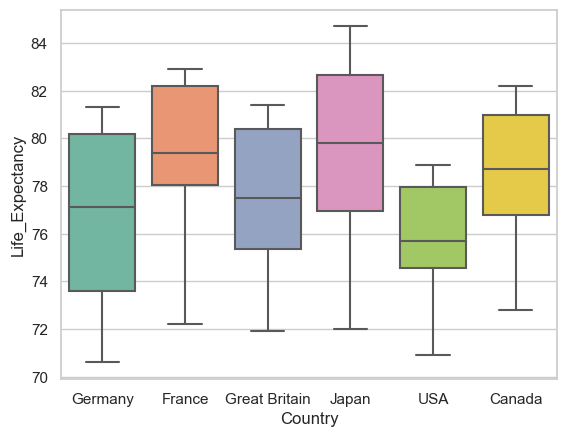

In [20]:
sns.boxplot(x=data['Country'],y=data['Life_Expectancy'],palette='Set2')

C:\Users\19mri\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


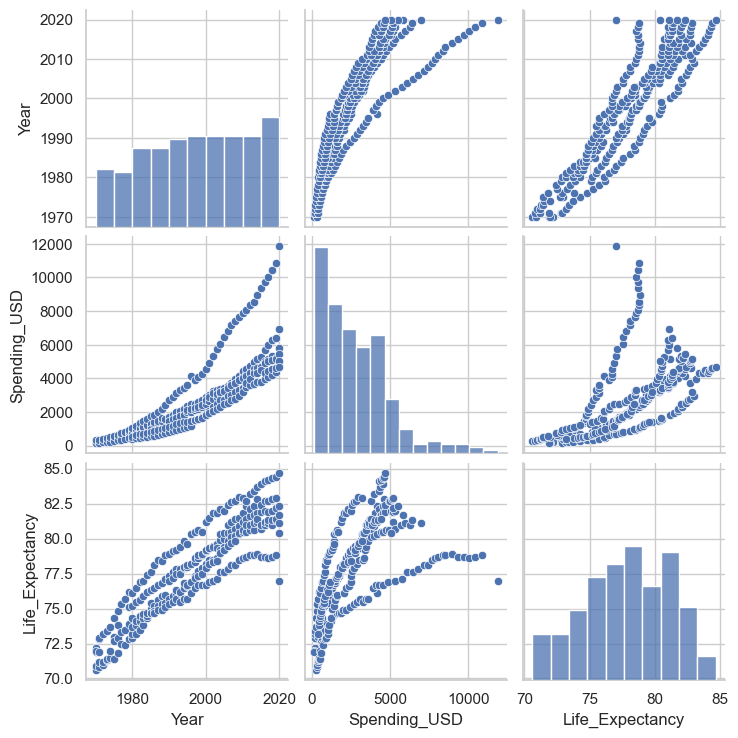

In [21]:
sns.pairplot(data=data)

## Multiple Linear Regression ( Country= Japan ):

In [22]:
data.head(4)

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0


In [23]:
country_J=data.groupby(['Country']).get_group('Japan')

In [24]:
country_J.head(6)

,Year,Country,Spending_USD,Life_Expectancy
3,1970,Japan,150.437,72.0
8,1971,Japan,163.854,72.9
11,1972,Japan,185.390,73.2
14,1973,Japan,205.778,73.4
17,1974,Japan,242.018,73.7
21,1975,Japan,284.269,74.3


In [25]:
country_J.corr(numeric_only=True)

,Year,Spending_USD,Life_Expectancy
Year,1.000000,0.960871,0.987683
Spending_USD,0.960871,1.000000,0.914187
Life_Expectancy,0.987683,0.914187,1.000000


<Axes: >

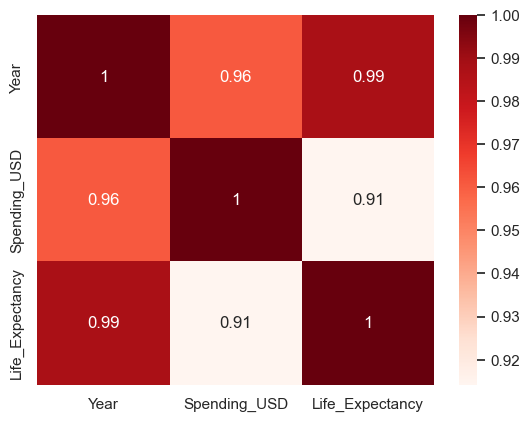

In [26]:
sns.heatmap(country_J.corr(numeric_only=True),annot=True,cmap='Reds')

In [27]:
from sklearn import linear_model

In [28]:
model=linear_model.LinearRegression()

In [29]:
x=country_J.iloc[:,[0,3]]

In [30]:
y=country_J.Spending_USD

In [31]:
model.fit(x,y)

LinearRegression()

In [32]:
country_J['Prediction in USD']=model.predict(x)

C:\Users\19mri\AppData\Local\Temp\ipykernel_20308\3600233059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_J['Prediction in USD']=model.predict(x)


In [33]:
country_J['error found']=country_J['Spending_USD']-country_J['Prediction in USD']

C:\Users\19mri\AppData\Local\Temp\ipykernel_20308\2124572304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_J['error found']=country_J['Spending_USD']-country_J['Prediction in USD']


In [34]:
country_J=country_J.iloc[:,[0,1,3,2,4,5]]   # Overwrite

In [35]:
country_J.head(10)

,Year,Country,Life_Expectancy,Spending_USD,Prediction in USD,error found
3,1970,Japan,72.0,150.437,468.501454,-318.064454
8,1971,Japan,72.9,163.854,172.219913,-8.365913
11,1972,Japan,73.2,185.390,229.183092,-43.793092
14,1973,Japan,73.4,205.778,345.020392,-139.242392
17,1974,Japan,73.7,242.018,401.983572,-159.965572
21,1975,Japan,74.3,284.269,282.324391,1.944609
25,1976,Japan,74.8,303.725,221.539331,82.185669
28,1977,Japan,75.3,340.628,160.754270,179.873730
31,1978,Japan,75.7,392.577,158.843329,233.733671
35,1979,Japan,76.2,452.931,98.058269,354.872731


In [36]:
model.coef_

array([ 233.58554048, -588.74120239])

In [37]:
model.intercept_

-417305.64671194326

In [38]:
model.predict([[2023,70]])

C:\Users\19mri\anaconda4\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14026.01750441])

In [39]:
from sklearn.metrics import r2_score
r2_score(country_J['Spending_USD'],country_J['Prediction in USD'])

0.9728761149928565

# FINAL SCORE OF THIS MOBEL (JAPAN ) :
# 97.3 % (Super-Model) ...

## Multiple Linear Regression ( Country= France ):

In [40]:
data.head(5)

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [41]:
F=data.groupby(['Country']).get_group('France')

In [42]:
F.head(10)

,Year,Country,Spending_USD,Life_Expectancy
1,1970,France,192.143,72.2
20,1975,France,363.610,73.0
39,1980,France,659.826,74.3
65,1985,France,1001.145,75.4
91,1990,France,1459.110,77.0
96,1991,France,1558.033,77.2
102,1992,France,1651.139,77.5
108,1993,France,1753.485,77.5
114,1994,France,1817.042,78.0
120,1995,France,2100.918,78.1


In [43]:
F.corr(numeric_only=True)

,Year,Spending_USD,Life_Expectancy
Year,1.000000,0.986430,0.990654
Spending_USD,0.986430,1.000000,0.969428
Life_Expectancy,0.990654,0.969428,1.000000


<Axes: >

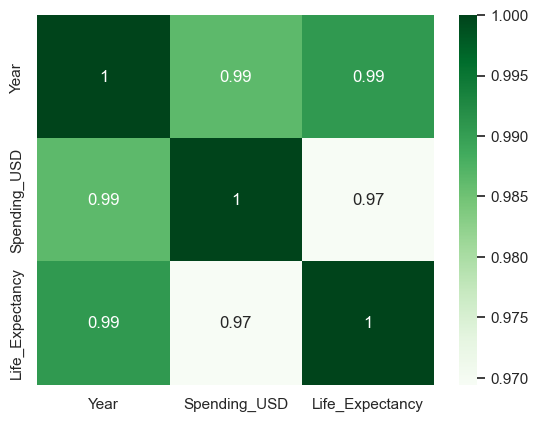

In [44]:
sns.heatmap(F.corr(numeric_only=True),annot=True,cmap='Greens')

In [45]:
x=F.iloc[:,[0,3]]

In [46]:
y=F.Spending_USD

In [47]:
model2=linear_model.LinearRegression()

In [48]:
model2.fit(x,y)

LinearRegression()

In [49]:
F['USD Predict']=model2.predict(x)

C:\Users\19mri\AppData\Local\Temp\ipykernel_20308\3198144415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  F['USD Predict']=model2.predict(x)


In [50]:
F['Error Found']=F['Spending_USD']-F['USD Predict']

C:\Users\19mri\AppData\Local\Temp\ipykernel_20308\130598603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  F['Error Found']=F['Spending_USD']-F['USD Predict']


In [51]:
F.head(10)

,Year,Country,Spending_USD,Life_Expectancy,USD Predict,Error Found
1,1970,France,192.143,72.2,-630.119491,822.262491
20,1975,France,363.610,73.0,23.134459,340.475541
39,1980,France,659.826,74.3,569.074985,90.751015
65,1985,France,1001.145,75.4,1157.940881,-156.795881
91,1990,France,1459.110,77.0,1639.493353,-180.383353
96,1991,France,1558.033,77.2,1761.559069,-203.526069
102,1992,France,1651.139,77.5,1862.162101,-211.023101
108,1993,France,1753.485,77.5,2027.153187,-273.668187
114,1994,France,1817.042,78.0,2084.830848,-267.788848
120,1995,France,2100.918,78.1,2228.359249,-127.441249


In [52]:
model2.coef_

array([ 164.99108568, -214.6268477 ])

In [53]:
model2.intercept_

-310166.49987721804

In [54]:
r2=r2_score(F['Spending_USD'],F['USD Predict'])

In [55]:
print(r2)

0.9763009619905436


# FINAL SCORE OF THIS MOBEL ( FRANCE ) :
# 98 % (Very Super-Model) ...

⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️